## Mental health post classification
from the subreddit repository we have selected the 4 mental health related posts anxiety,bipolar,depression lonely and suicide on the other hand we have selected 2 categories of non mental health posts also whciare parenting and teaching.  
Each category of file is downloaded in csv format and combined the data using pandas framework  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


According to WHO report of 2019 970 million people around the world were living with a mental disorder these factors are alarming. anxiety and depressive disorders the most common mental disorders. The rate of  disorders rose significantly during COVID-19 pandemic from 26 percent to 28 percent.

Anxiety Disorders

In [ ]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize  # You may need to install the nltk library
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report



from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))


In [ ]:

# merging the files of different mental health categories
file_paths = ['/content/drive/MyDrive/dataset/anxiety.csv',
              '/content/drive/MyDrive/dataset/bipolar.csv',
              '/content/drive/MyDrive/dataset/depression.csv',
              '/content/drive/MyDrive/dataset/lonely.csv',
              '/content/drive/MyDrive/dataset/parenting.csv',
              '/content/drive/MyDrive/dataset/suicide.csv',
              '/content/drive/MyDrive/dataset/teaching.csv'

              ]

# Read and concatenate the files
combined_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv('/content/drive/MyDrive/dataset/finalData/mental_health_data.csv', index=False)


In [ ]:
#reading the final data
mental_health_data=pd.read_csv('/content/drive/MyDrive/dataset/finalData/mental_health_data.csv')

In [ ]:
#dropping the unnecessary columns from the data
final_data=mental_health_data[['post','subreddit']]

In [ ]:
final_data.head()

,post,subreddit
0,Does anyone else like taking long walks while ...,anxiety
1,Meditation is making me anxious I do a couple ...,anxiety
2,Rant about anxiety meds - I've been self medic...,anxiety
3,Some advice for my friend please? I dated this...,anxiety
4,Feeling like I’m back to where I started. I’ve...,anxiety


In [ ]:
final_data.describe()

,post,subreddit
count,42865,42865
unique,42851,7
top,it’s time i had an extended family member die ...,depression
freq,2,15347


## Categories overview

In [ ]:

# Display unique values in the 'subreddit' column before replacement
print("Unique categories before replacement:", final_data['subreddit'].unique())

Unique categories before replacement: ['anxiety' 'bipolarreddit' 'depression' 'lonely' 'parenting'
 'suicidewatch' 'teaching']


In [ ]:
print('Total posts are:',len(final_data['subreddit']))

Total posts are: 42865


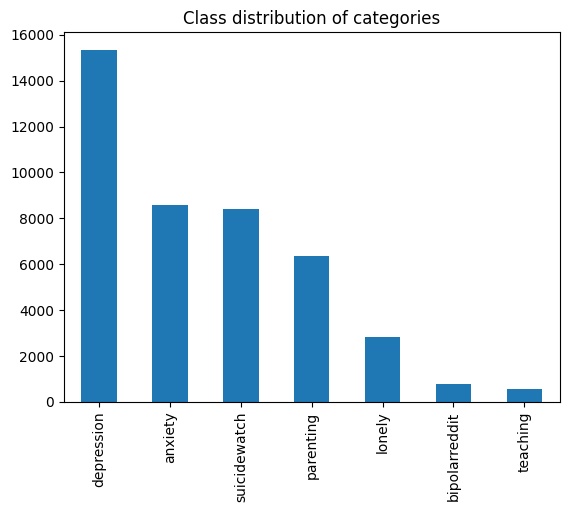

In [ ]:
#class distribution

final_data['subreddit'].value_counts().plot(kind='bar')
plt.title('Class distribution of categories')
plt.show()


In the database we have 15 different categories of mental health   
we have considered 4 major categories depression,anxiety, lonely,bipolar and suicidal 2 categories of non mental health (parenting and teaching)   
dominant class is drepression and non dominant class is teaching

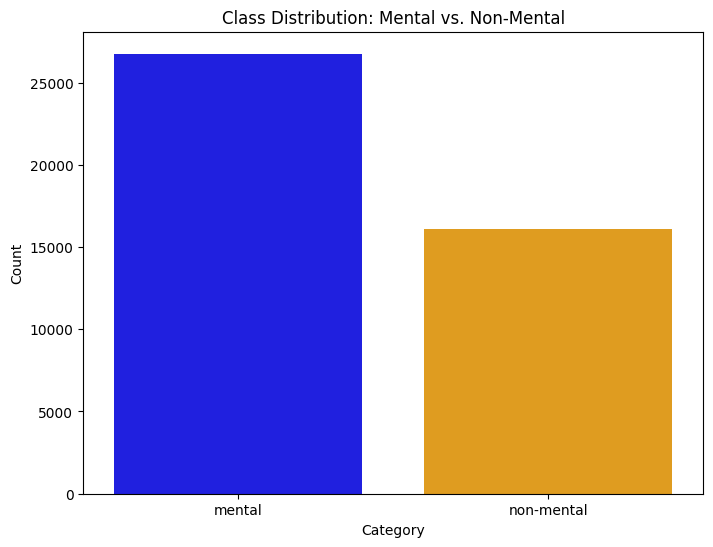

In [ ]:
# Define a function to categorize posts as mental or non-mental
def categorize_mental(category):
    mental_categories = ['anxiety', 'depression', 'bipolar', 'lonely', 'suicide']
    return 'mental' if category in mental_categories else 'non-mental'

# Display the class distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x=final_data['subreddit'].apply(categorize_mental), palette={'mental': 'blue', 'non-mental': 'orange'})
plt.title('Class Distribution: Mental vs. Non-Mental')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<ipython-input-19-baa3e901d7a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['text_length'] = final_data['subreddit'].apply(len)
<ipython-input-19-baa3e901d7a7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='subreddit', y='text_length', data=average_text_length, ci=None)


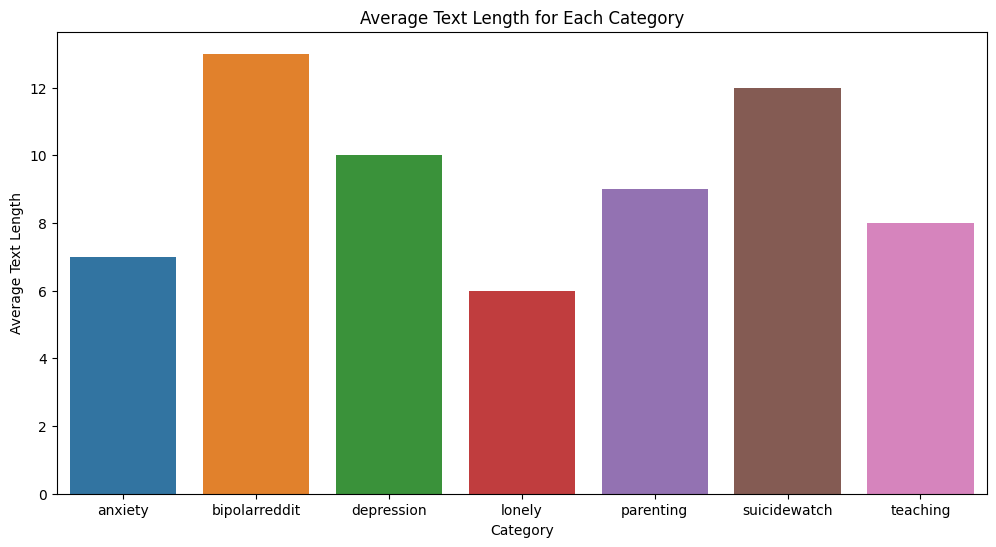

In [ ]:

# Add a new column to the DataFrame to store the length of each text
final_data['text_length'] = final_data['subreddit'].apply(len)

# Group by 'subreddit' and calculate the mean text length for each category
average_text_length = final_data.groupby('subreddit')['text_length'].mean().reset_index()

# Display the average text length for each category using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='subreddit', y='text_length', data=average_text_length, ci=None)
plt.title('Average Text Length for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Text Length')
plt.show()


non mental posts have long sentences compared to the mental health related posts  
In the category of mental health issues category bipolar and depression categories have lenghthy sentences  

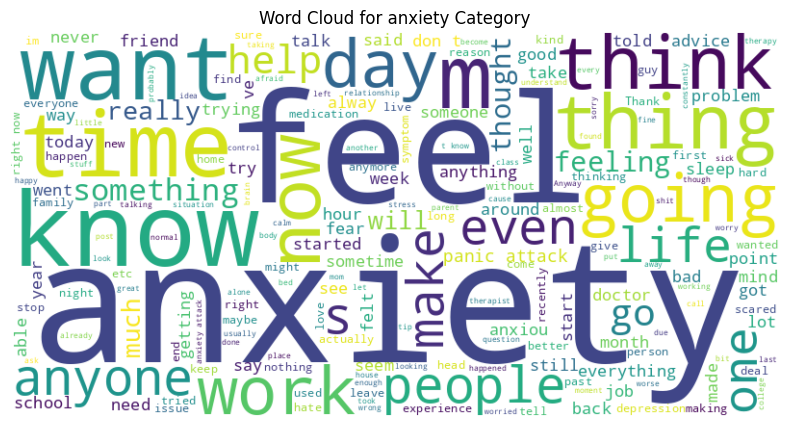

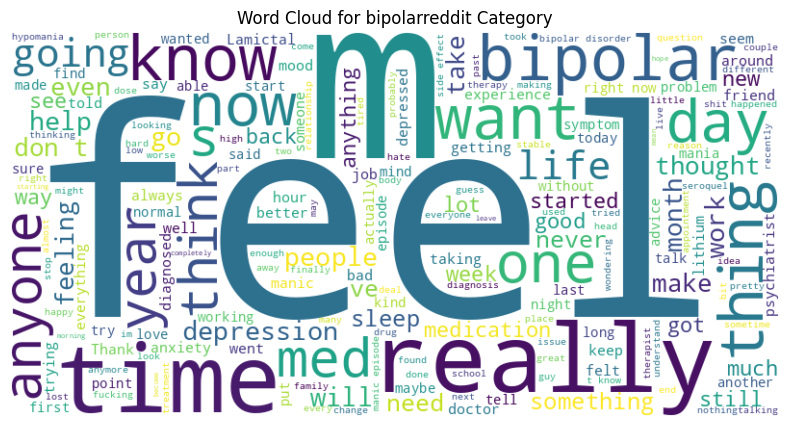

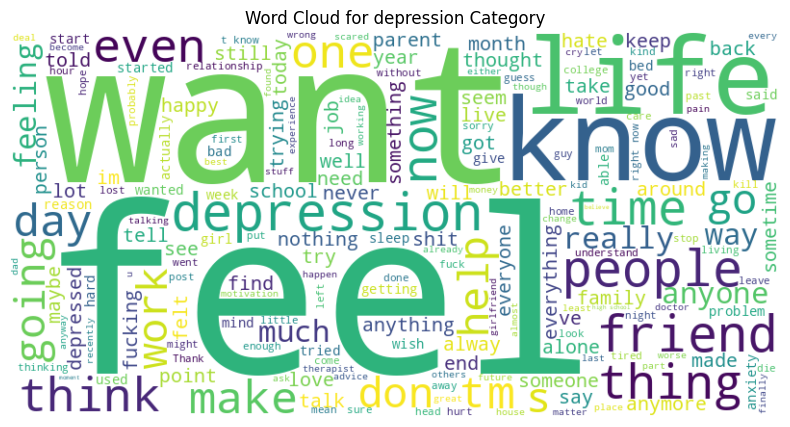

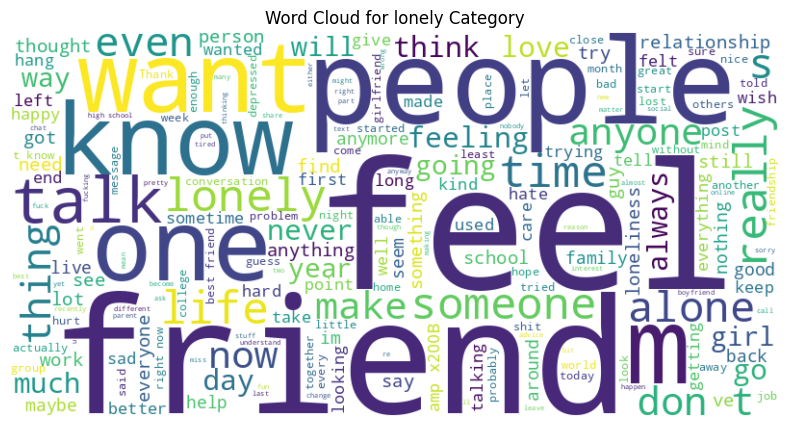

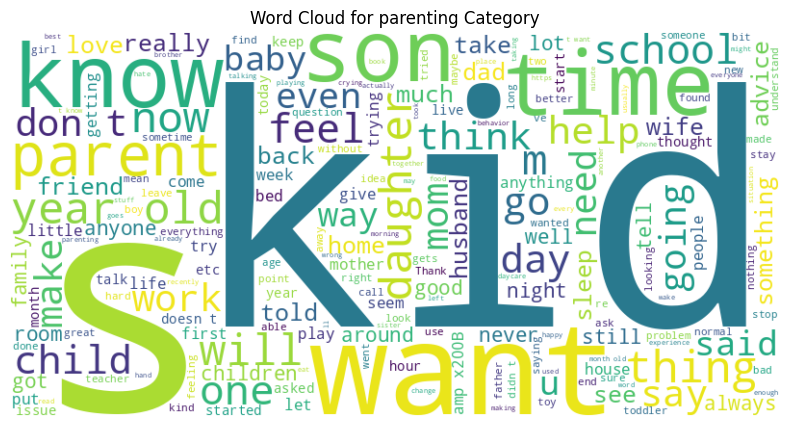

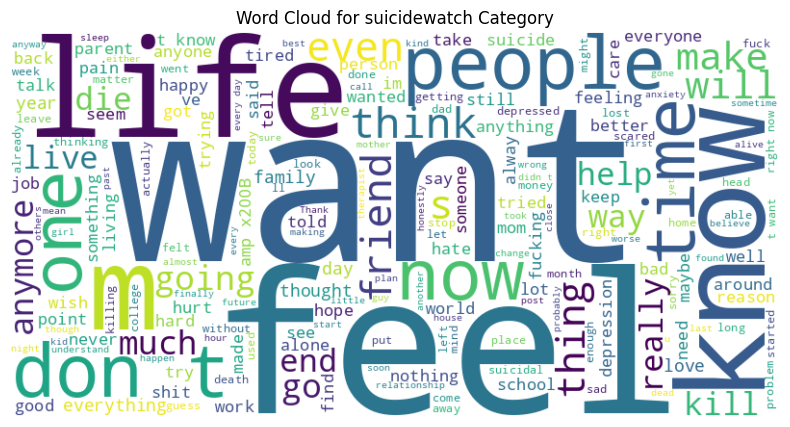

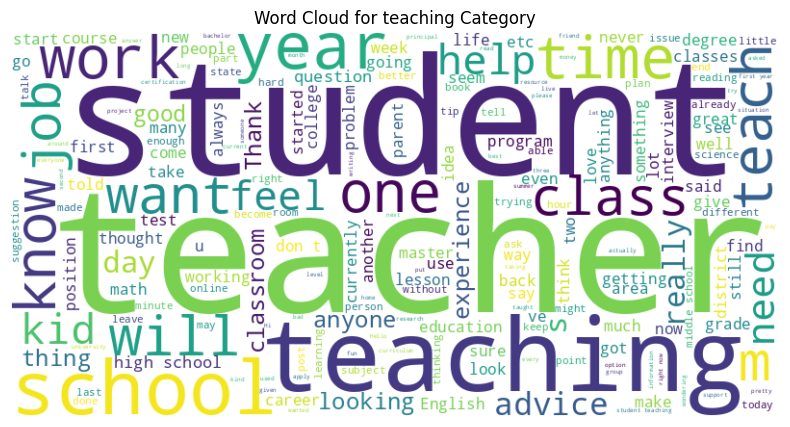

In [ ]:
# Generate word clouds for each category
categories = final_data['subreddit'].unique()

for category in categories:
    # Filter data for the specific category
    category_data = final_data[final_data['subreddit'] == category]

    # Combine all text for the category
    text_for_category = ' '.join(category_data['post'])

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_category)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis('off')
    plt.show()

The above word clouds show that feel is the common frequent word across mental issue posts and in the non mental category kid is common in parenting and teacher and student are the frequent words.  
There are common explicit terms also in the each mental category like depression,lonely,anxiety and bipolar  

In [ ]:
# Define the list of explicit words
explicit_words = ['anxiety', 'depression', 'bipolar', 'lonely', 'suicide']

# Filter out posts containing explicit words
filtered_data = final_data[~final_data['post'].str.contains('|'.join(explicit_words), case=False)]

# Display the number of posts before and after filtering
print("Number of posts before filtering:", len(final_data))
print("Number of posts after filtering:", len(filtered_data))

Number of posts before filtering: 42865
Number of posts after filtering: 24018


## N-gram analysis

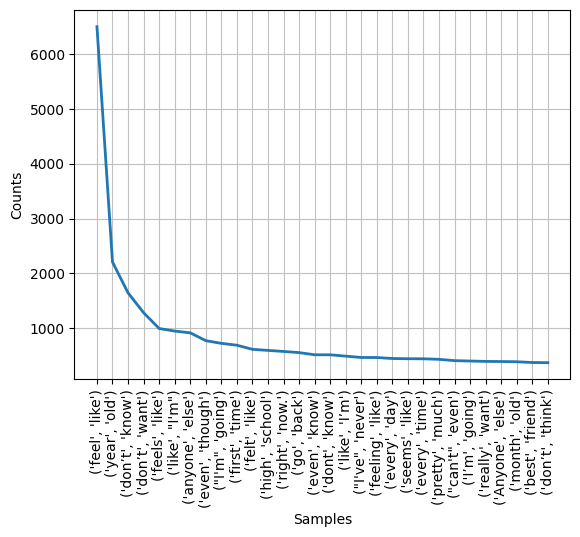

In [ ]:
n = 2  # Set n to the desired size of n-grams (e.g., 2 for bigrams, 3 for trigrams)
tokens = [gram for text in filtered_data['post'] for gram in ngrams(text.split(), n) if all(word.lower() not in stop_words for word in gram)]

# Create a frequency distribution
freq_distribution = FreqDist(tokens)

# Plot the frequency distribution
freq_distribution.plot(30, cumulative=False)
# plt.title('Bigram analysis')
plt.show()

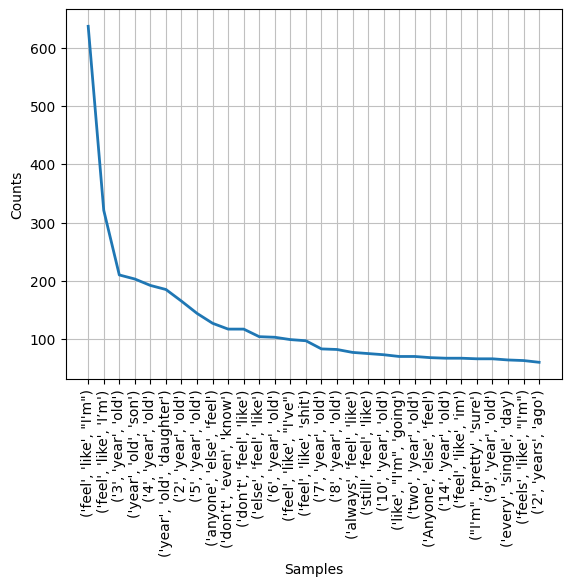

In [ ]:
n = 3 # Set n to the desired size of n-grams (e.g., 2 for bigrams, 3 for trigrams)
tokens = [gram for text in filtered_data['post'] for gram in ngrams(text.split(), n) if all(word.lower() not in stop_words for word in gram)]

# Create a frequency distribution
freq_distribution = FreqDist(tokens)

# Plot the frequency distribution
freq_distribution.plot(30, cumulative=False)
plt.show()


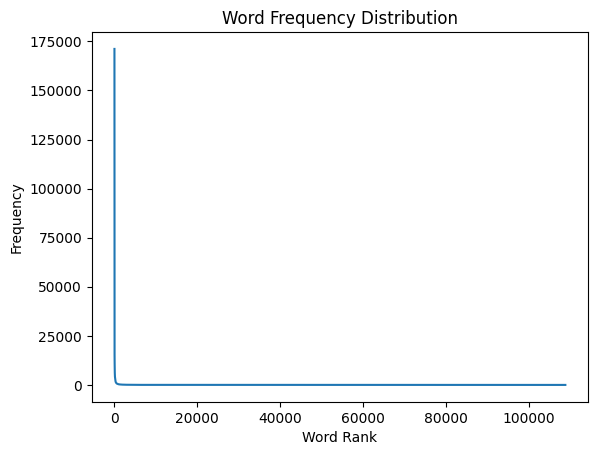

In [ ]:
# Assuming 'filtered_data' is your DataFrame with a 'post' column
word_counts = Counter(" ".join(filtered_data['post']).split())
word_freq = sorted(word_counts.values(), reverse=True)

plt.plot(word_freq)
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()

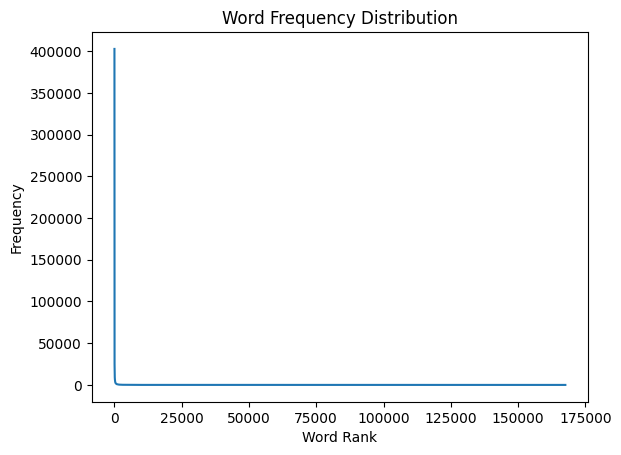

In [ ]:
# Assuming 'filtered_data' is your DataFrame with a 'post' column
word_counts = Counter(" ".join(final_data['post']).split())
word_freq = sorted(word_counts.values(), reverse=True)

plt.plot(word_freq)
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()

#LSTM model-without explicit words



In [ ]:
# Preprocess the text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(filtered_data['post'])
X = tokenizer.texts_to_sequences(filtered_data['post'])
X = pad_sequences(X, maxlen=50)  # Adjust maxlen based on the maximum length of your posts

In [ ]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(filtered_data['subreddit'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           500000    
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 100)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 7)                 707       
                                                                 
Total params: 581107 (2.22 MB)
Trainable params: 581107 (2.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
601/601 [==============================] - 47s 73ms/step - loss: 1.2374 - accuracy: 0.5088 - val_loss: 1.0690 - val_accuracy: 0.5797
Epoch 2/10
601/601 [==============================] - 47s 78ms/step - loss: 0.9674 - accuracy: 0.6230 - val_loss: 1.0175 - val_accuracy: 0.6222
Epoch 3/10
601/601 [==============================] - 42s 70ms/step - loss: 0.8330 - accuracy: 0.6787 - val_loss: 0.9997 - val_accuracy: 0.6226
Epoch 4/10
601/601 [==============================] - 46s 76ms/step - loss: 0.7396 - accuracy: 0.7155 - val_loss: 0.9851 - val_accuracy: 0.6384
Epoch 5/10
601/601 [==============================] - 42s 70ms/step - loss: 0.6735 - accuracy: 0.7436 - val_loss: 1.0049 - val_accuracy: 0.6324
Epoch 6/10
601/601 [==============================] - 45s 74ms/step - loss: 0.6194 - accuracy: 0.7668 - val_loss: 1.0580 - val_accuracy: 0.6222
Epoch 7/10
601/601 [==============================] - 42s 70ms/step - loss: 0.5634 - accuracy: 0.7911 - val_loss: 1.1680 - val_accuracy:

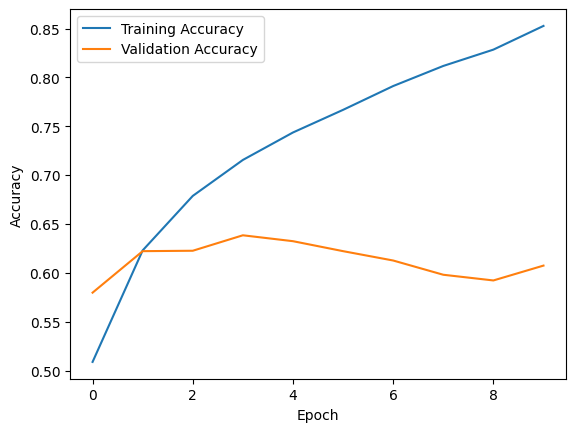

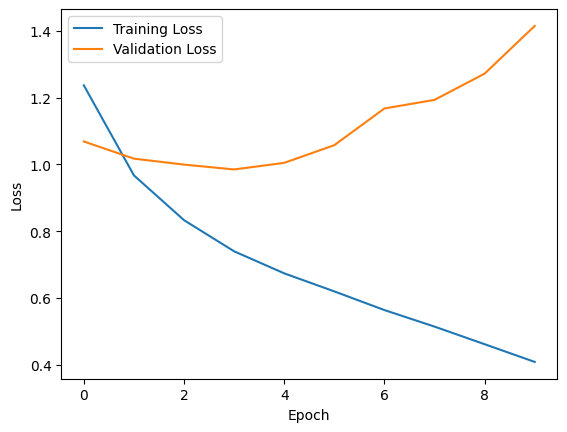

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

151/151 [==============================] - 3s 16ms/step


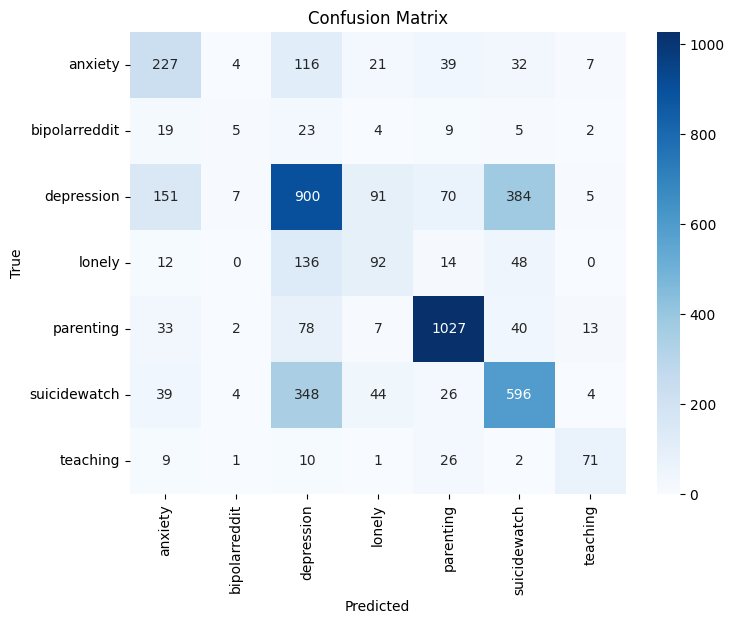

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Inverse transform the numeric labels to class names
y_test_class_names = le.inverse_transform(y_test)
y_pred_class_names = le.inverse_transform(y_pred_classes)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_class_names, y_pred_class_names)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Highest correctly classified category is parenting which is non-mental disorder category and depression mental disorder category and suicide watch.Higly misclassified categories are depression as suicide watch and suicide watch as depression and depression and anxiety also misclassfied.

In [ ]:
#Print the classification report
print("Classification Report:\n", classification_report(y_test_class_names, y_pred_class_names, target_names=le.classes_))

Classification Report:
                precision    recall  f1-score   support

      anxiety       0.46      0.51      0.49       446
bipolarreddit       0.22      0.07      0.11        67
   depression       0.56      0.56      0.56      1608
       lonely       0.35      0.30      0.33       302
    parenting       0.85      0.86      0.85      1200
 suicidewatch       0.54      0.56      0.55      1061
     teaching       0.70      0.59      0.64       120

     accuracy                           0.61      4804
    macro avg       0.53      0.49      0.50      4804
 weighted avg       0.60      0.61      0.60      4804



## LSTM model for overall data

In [ ]:
# Preprocess the text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(final_data['post'])
X = tokenizer.texts_to_sequences(filtered_data['post'])
X = pad_sequences(X, maxlen=50)  # Adjust maxlen based on the maximum length of your posts

In [ ]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(filtered_data['subreddit'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           500000    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 50, 100)           0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 7)                 707       
                                                                 
Total params: 581107 (2.22 MB)
Trainable params: 581107 (2.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
601/601 [==============================] - 48s 74ms/step - loss: 1.2262 - accuracy: 0.5172 - val_loss: 1.0556 - val_accuracy: 0.5953
Epoch 2/10
601/601 [==============================] - 41s 68ms/step - loss: 0.9695 - accuracy: 0.6233 - val_loss: 1.0006 - val_accuracy: 0.6172
Epoch 3/10
601/601 [==============================] - 44s 74ms/step - loss: 0.8444 - accuracy: 0.6760 - val_loss: 0.9790 - val_accuracy: 0.6336
Epoch 4/10
601/601 [==============================] - 41s 69ms/step - loss: 0.7485 - accuracy: 0.7141 - val_loss: 0.9984 - val_accuracy: 0.6224
Epoch 5/10
601/601 [==============================] - 41s 68ms/step - loss: 0.6807 - accuracy: 0.7426 - val_loss: 1.0276 - val_accuracy: 0.6299
Epoch 6/10
601/601 [==============================] - 43s 71ms/step - loss: 0.6184 - accuracy: 0.7666 - val_loss: 1.0889 - val_accuracy: 0.6087
Epoch 7/10
601/601 [==============================] - 41s 69ms/step - loss: 0.5611 - accuracy: 0.7934 - val_loss: 1.1454 - val_accuracy:

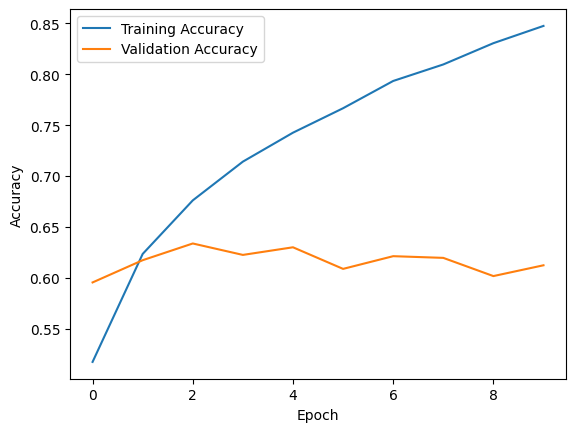

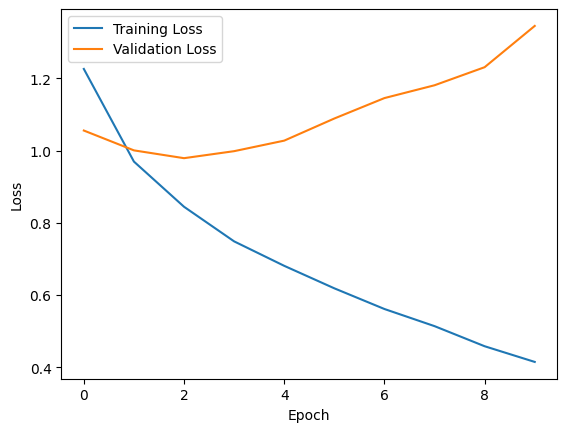

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

151/151 [==============================] - 3s 16ms/step


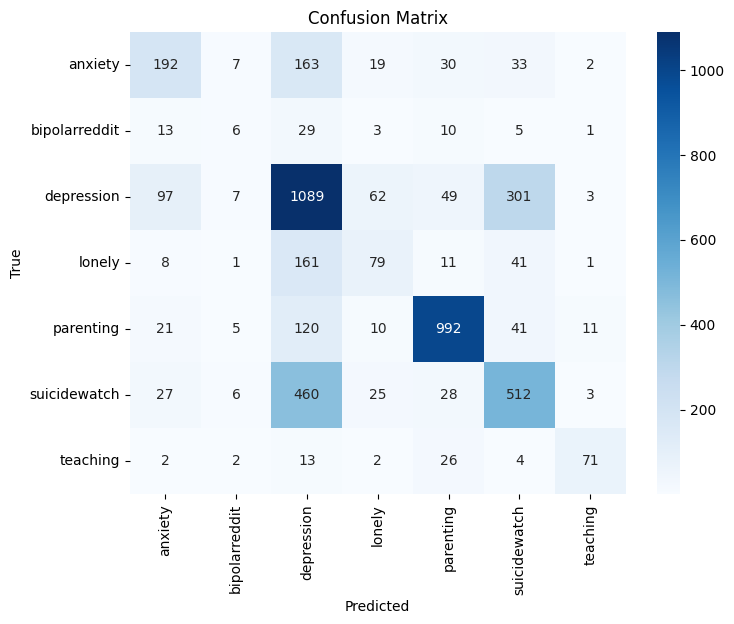

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Inverse transform the numeric labels to class names
y_test_class_names = le.inverse_transform(y_test)
y_pred_class_names = le.inverse_transform(y_pred_classes)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_class_names, y_pred_class_names)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Highly correctly classified category is parenting which is non mental disorder category depression is the second highest and suicide watch is the third category. Highy misclassified category is suicide watch as depression and depression as suicide watch and anxiety also misclassified as depression.

In [ ]:
#Print the classification report
print("Classification Report:\n", classification_report(y_test_class_names, y_pred_class_names, target_names=le.classes_))

Classification Report:
                precision    recall  f1-score   support

      anxiety       0.53      0.43      0.48       446
bipolarreddit       0.18      0.09      0.12        67
   depression       0.54      0.68      0.60      1608
       lonely       0.40      0.26      0.31       302
    parenting       0.87      0.83      0.85      1200
 suicidewatch       0.55      0.48      0.51      1061
     teaching       0.77      0.59      0.67       120

     accuracy                           0.61      4804
    macro avg       0.55      0.48      0.51      4804
 weighted avg       0.61      0.61      0.61      4804



The classification report shows highest precision for parenting category and lowest for bipolar. highest recall for parenting and lowest for bipolar and highest f1 score for parenting and low for bipolar